In [1]:
#always run this cell

import pandas as pd
import networkx as net

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

import matplotlib.pyplot as plt
from pandas import *

df = pd.read_csv('spins.csv', encoding = 'ISO-8859-1')

# sort the dataframe
df.sort_values(by='Name', axis=0, inplace=True)

# set the index to be this and don't drop
df.set_index(keys=['Name'], drop=False,inplace=True)

# get a list of names
names=df['Name'].unique().tolist()

# from https://stackoverflow.com/questions/19790790/splitting-dataframe-into-multiple-dataframes
# example of getting individual names:
#Grady = df.loc[df.Name=='Grady'].head(1000)

names_pairs = [(a, b) for idx, a in enumerate(names) for b in names[idx + 1:]]
#this method from https://www.geeksforgeeks.org/python-all-possible-pairs-in-list/

relationships = pd.DataFrame(names_pairs, columns = ['DJ_1', 'DJ_2'])
relationships["Weight"] = 0       

counter = 0

for index, row in relationships.iterrows():
    df1 = df.loc[df.Name==row['DJ_1']].head(800)
    df2 = df.loc[df.Name==row['DJ_2']].head(800)
    list1 = df1['Artist'].values.tolist()
    list2 = df2['Artist'].values.tolist()
    #print(row['DJ_1'],row['DJ_2'])
    intList = []
    for element in list1:
        if element in list2:
            intList.append(element)
    revList = []
    for element in list2:
        if element in list1:
            revList.append(element)
    w = (len(intList)+len(revList))/40
    if w >= 2.5:
        relationships.at[counter,'Weight']=w
    else:
       # relationships.drop(index=counter)
       # counter = counter-1
        relationships.at[counter,'Weight']=0
    #print(w)
    counter = counter+1
    


for index,row in relationships.iterrows():
    if row['Weight'] == 0:
        relationships = relationships.drop(index=index)
       # print('We dropped ')
       # print(row['DJ_1'])
       # print(row['DJ_2'])
netty = net.from_pandas_edgelist(relationships, 'DJ_1', 'DJ_2', 'Weight')

In [2]:
netty = net.from_pandas_edgelist(relationships, 'DJ_1', 'DJ_2', 'Weight')

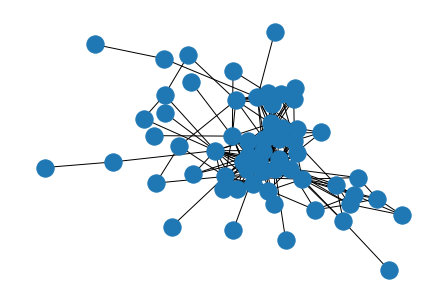

In [3]:
net.draw(netty)

In [4]:
data = read_csv("CSV Spinitron Data - Community DJs.csv")
communityList = data['DJ'].tolist()
data = read_csv("CSV Spinitron Data - Student DJs.csv")
studentList = data['DJ'].tolist()

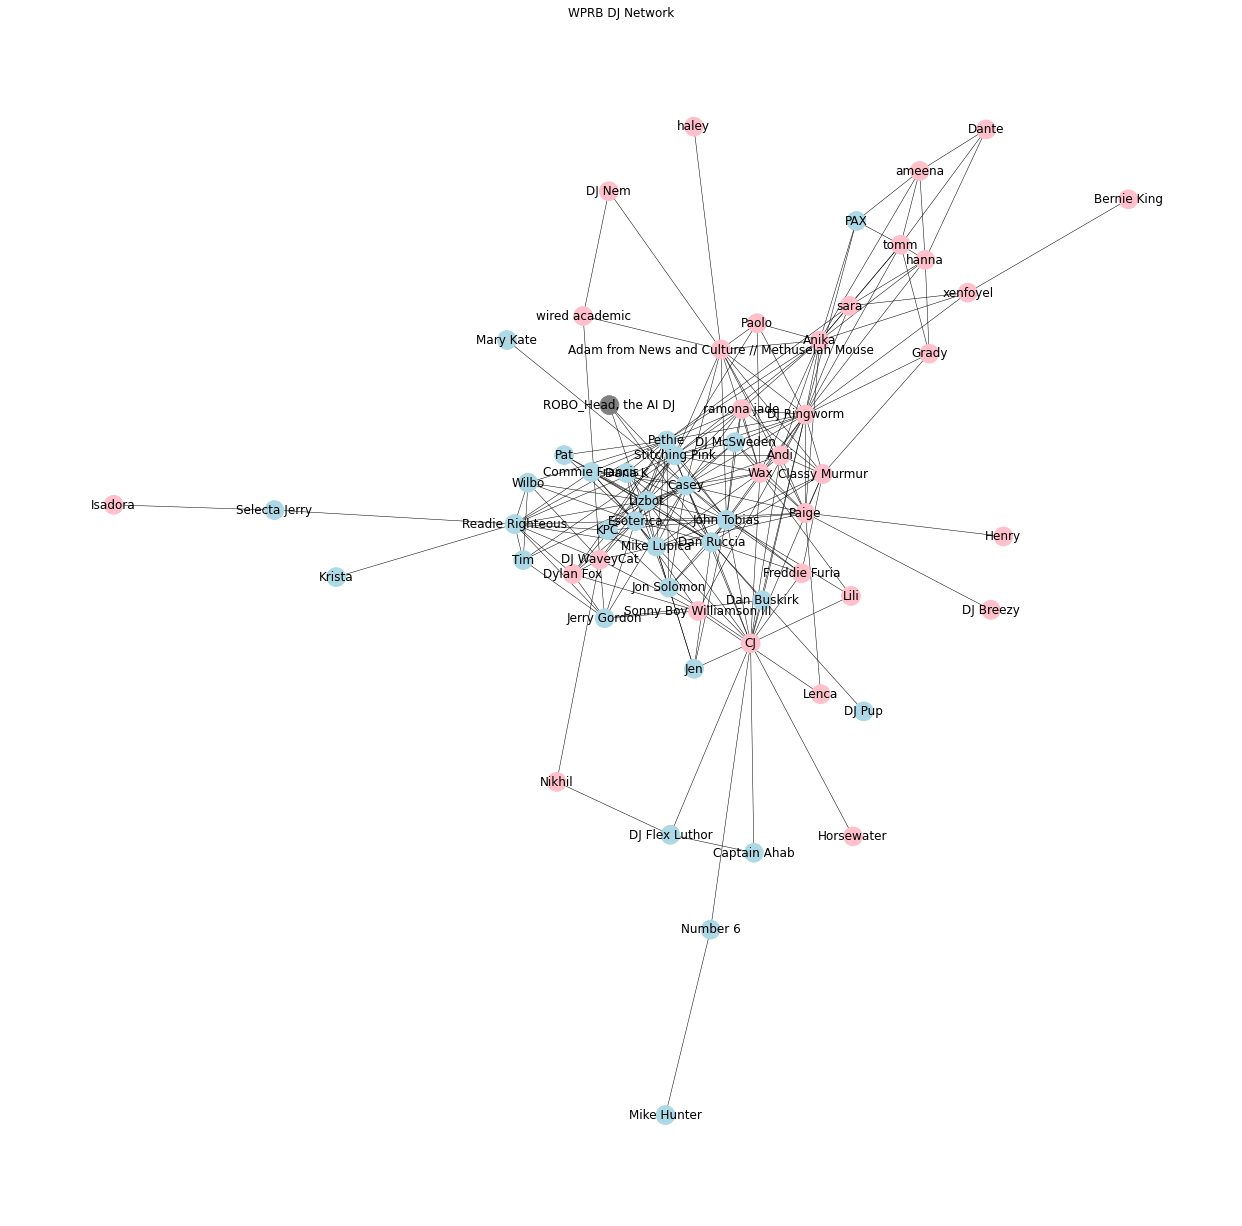

In [5]:
# Make the size of our plotting area larger
plt.figure(figsize=(22,22))

# Set the axis 
ax = plt.gca()

# Define the title
ax.set_title('WPRB DJ Network')

colors = []

for node in netty:
    if node in communityList:
        colors.append("lightblue")
    elif node in studentList:
        colors.append("pink")
    else: 
        colors.append("gray")



# Use networkx to generate our network diagram.
# We're also going to turn the labels on, set the node color and font size
net.draw(netty, with_labels=True, node_size=350, node_color=colors, width=0.5, font_size=12)
_ = ax.axis('off')

#This method from Prof. Eckert.

In [6]:
import numpy as np
from bokeh.io import output_notebook, show, save

In [7]:
output_notebook()

Loading BokehJS ...

In [8]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [11]:
#Choose a title!
title = 'WPRB DJ Connections'

node_highlight_color = 'white'
edge_highlight_color = 'green'



#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("DJ Name", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(netty, net.spring_layout, scale=15, center=(0, 0))


#Set node size and color
network_graph.node_renderer.glyph = Circle(size=20, fill_color='pink')



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width='Weight')
#Is this the right way to get weight? Idk what I did, lol

network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width='Weight')
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width='Weight')



network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename=f"{title}.html")

#attribute of nodes

#This method from Prof. Eckert.

In [9]:
communities = community.greedy_modularity_communities(netty)
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]
net.set_node_attributes(netty, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(netty.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

communities_df

,node,modularity_class
57,Selecta Jerry,5
56,Isadora,5
10,Stitching Pink,4
20,ramona jade,4
37,DJ McSweden,4
...,...,...
38,Dana K,0
36,Commie Francis,0
28,Dan Ruccia,0
34,Mike Lupica,0


In [53]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community

#visualization colored by communities
communities = community.greedy_modularity_communities(netty)
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]
        
# Add modularity class and color as attributes from the network above
net.set_node_attributes(netty, modularity_class, 'modularity_class')
net.set_node_attributes(netty, modularity_color, 'modularity_color')

color_by_this_attribute = 'modularity_color'



#Choose a title!
title = 'WPRB DJs Connections with Communities'

node_highlight_color = 'white'
edge_highlight_color = 'green'



#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("DJ Name", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(netty, net.spring_layout, scale=15, center=(0, 0))


#Set node size and color
network_graph.node_renderer.glyph = Circle(size=20, fill_color=color_by_this_attribute)


#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width='Weight')
#Is this the right way to get weight? Idk what I did, lol

network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width='Weight')
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width='Weight')



network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
# If we want to save the plot, uncomment the line below and run this cell. It will save this plot as an HTML file
#save(plot, filename="WPRB_Network_Greedy.html")

#attribute of nodes

#This method from Prof. Eckert.

/Users/gradytrexler/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/gradytrexler/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/gradytrexler/Desktop/IntroDHSpring2021-main/final project/WPRB_Network_Greedy.html'

In [12]:
from networkx.algorithms.community.centrality import girvan_newman

communities2 = community.girvan_newman(netty, most_valuable_edge=None)



AttributeError: 'tuple' object has no attribute 'girvan_newman'

In [54]:
node_groups = []
for com in next(communities2):
    node_groups.append(list(com))

print(node_groups)


color_map = []
for node in netty:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
net.draw(netty, node_color=color_map, with_labels=True)
plt.show()

#this and below methods from networkx documentation

StopIteration: 

In [24]:
import itertools

In [37]:
k=3

for communities in itertools.islice(communities2, k):
    print(tuple(sorted(c) for c in communities))

In [50]:
import itertools
k = 2
comp = girvan_newman(netty)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))

(['Adam from News and Culture // Methuselah Mouse', 'Andi', 'Anika', 'Bernie King', 'CJ', 'Captain Ahab', 'Casey', 'Classy Murmur', 'Commie Francis', 'DJ Breezy', 'DJ Flex Luthor', 'DJ McSweden', 'DJ Nem', 'DJ Pup', 'DJ Ringworm', 'DJ WaveyCat', 'Dan Buskirk', 'Dan Ruccia', 'Dana K', 'Dante', 'Dylan Fox', 'Esoterica', 'Freddie Furia', 'Grady', 'Henry', 'Horsewater', 'Isadora', 'Jen', 'Jerry Gordon', 'John Tobias', 'Jon Solomon', 'KPC', 'Krista', 'Lenca', 'Lili', 'Lizbot', 'Mary Kate', 'Mike Lupica', 'Nikhil', 'PAX', 'Paige', 'Paolo', 'Pat', 'Pethie', 'ROBO_Head, the AI DJ', 'Readie Righteous', 'Selecta Jerry', 'Sonny Boy Williamson III', 'Stitching Pink', 'Tim', 'Wax', 'Wilbo', 'ameena', 'haley', 'hanna', 'ramona jade', 'sara', 'tomm', 'wired academic', 'xenfoyel'], ['Mike Hunter', 'Number 6'])


In [51]:
comp_df = pd.DataFrame(comp)
comp_df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"{Paolo, Stitching Pink, Readie Righteous, ROBO...","{xenfoyel, Bernie King}","{Number 6, Mike Hunter}","{Selecta Jerry, Isadora}",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{Paolo, Stitching Pink, Readie Righteous, ROBO...","{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}","{Number 6, Mike Hunter}","{Selecta Jerry, Isadora}",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}","{Number 6, Mike Hunter}","{Selecta Jerry, Isadora}",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}","{Number 6, Mike Hunter}",{Mary Kate},"{Selecta Jerry, Isadora}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}","{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},"{Selecta Jerry, Isadora}",None,None,...,None,None,None,None,None,None,None,None,None,None
5,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}","{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},{Henry},"{Selecta Jerry, Isadora}",None,...,None,None,None,None,None,None,None,None,None,None
6,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}",{Horsewater},"{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},{Henry},"{Selecta Jerry, Isadora}",...,None,None,None,None,None,None,None,None,None,None
7,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}",{Horsewater},"{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},{DJ Pup},{Henry},...,None,None,None,None,None,None,None,None,None,None
8,"{Paolo, Stitching Pink, Readie Righteous, ROBO...",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}",{Horsewater},"{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},{DJ Pup},{Henry},...,None,None,None,None,None,None,None,None,None,None
9,"{Paolo, Stitching Pink, Readie Righteous, ROBO...","{wired academic, DJ Nem}",{haley},"{xenfoyel, Bernie King}","{Nikhil, DJ Flex Luthor, Captain Ahab}",{Horsewater},"{Number 6, Mike Hunter}",{Mary Kate},{DJ Breezy},{DJ Pup},...,None,None,None,None,None,None,None,None,None,None


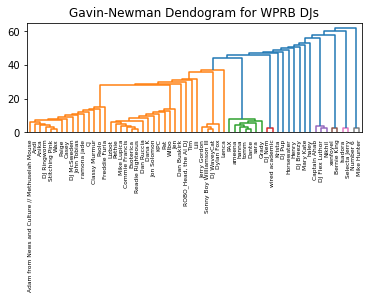

In [68]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# get simulated Graph() and Girvan-Newman communities list
G = netty
communities = list(nx.community.girvan_newman(G))

# building initial dict of node_id to each possible subset:
node_id = 0
init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
for comm in communities:
    for subset in list(comm):
        if subset not in init_node2community_dict.values():
            node_id += 1
            init_node2community_dict[node_id] = subset

# turning this dictionary to the desired format in @mdml's answer
node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
    for node_id_parent, group in init_node2community_dict.items():
        if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
            node_id_to_children[node_id_parent].append(node_id1)
            node_id_to_children[node_id_parent].append(node_id2)

# also recording node_labels dict for the correct label for dendrogram leaves
node_labels = dict()
for node_id, group in init_node2community_dict.items():
    if len(group) == 1:
        node_labels[node_id] = list(group)[0]
    else:
        node_labels[node_id] = ''

# also needing a subset to rank dict to later know within all k-length merges which came first
subset_rank_dict = dict()
rank = 0
for e in communities[::-1]:
    for p in list(e):
        if tuple(p) not in subset_rank_dict:
            subset_rank_dict[tuple(sorted(p))] = rank
            rank += 1
subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

# finally using @mdml's magic, slightly modified:
G           = nx.DiGraph(node_id_to_children)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(node_id_to_children[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += node_id_to_children[v]
    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = node_id_to_children[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
        Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# dendrogram
plt.figure()
plt.subplots_adjust(bottom=0.50)
#thanks to https://stackoverflow.com/questions/6774086/how-to-adjust-padding-with-cutoff-or-overlapping-labels
ax = plt.gca()
ax.set_title('Gavin-Newman Dendogram for WPRB DJs')
dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
plt.savefig('dendrogram.png', dpi=300)

#this method from https://stackoverflow.com/questions/59821151/plot-the-dendrogram-of-communities-found-by-networkx-girvan-newman-algorithm
#with help from https://stackoverflow.com/questions/63038379/add-title-to-networkx-plot


In [92]:
netty.number_of_nodes()
#this tells us the number of DJs who ended up in our network

62

Works Cited

Eckert, Sierra. "Introduction to Network Analysis." 2022, https://mybinder.org/v2/gh/sceckert/introdhFall2022/main?urlpath=lab/tree/_week10/network-analysis.ipynb. 

EdChum and McKinney, Trenton. "Splitting Dataframe into Multiple Dataframes." Stack Overflow, Stack Exchange, Sep 10, 2020, https://stackoverflow.com/questions/19790790/splitting-dataframe-into-multiple-dataframes. 

NetworkX Developers. "girvan_newman." NetworkX, 2020, https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html. 

"Python - All Possible Pairs in List." Geeks for Geeks, July 3, 2020, https://www.geeksforgeeks.org/python-all-possible-pairs-in-list/. 

Simchoni, Giora. "Plot the dendrogram of communities found by NetworkX Girvan-Newman algorithm." Stack Overflow, Stack Exchange, Jan 20, 2020, https://stackoverflow.com/questions/59821151/plot-the-dendrogram-of-communities-found-by-networkx-girvan-newman-algorithm. 

Tillsten and McKinney, Trenton. "How to adjust padding with cutoff or overlapping labels." Stack Overflow, Stack Exchange, July 28, 2021, https://stackoverflow.com/questions/6774086/how-to-adjust-padding-with-cutoff-or-overlapping-labels. 

yatu. "Add title to networkX plot?" Stack Exchange, Stack Overflow, if given, July 22, 2020, https://stackoverflow.com/questions/63038379/add-title-to-networkx-plot. 





